# DAY 48

在继续讲解模块消融前，先补充几个之前没提的基础概念

尤其需要搞懂张量的维度、以及计算后的维度，这对于你未来理解复杂的网络至关重要

## 一、 随机张量的生成

在深度学习中经常需要随机生成一些张量，比如权重的初始化，或者计算输入纬度经过模块后输出的维度，都可以用一个随机函数来实现需要的张量格式，而无需像之前一样必须加载一张真实的图片。

随机函数的种类很多，我们了解其中一种即可，毕竟目的主要就是生成，对分布要求不重要。

### 1.1 torch.randn函数
在 PyTorch 中，torch.randn()是一个常用的随机张量生成函数，它可以创建一个由标准正态分布（均值为 0，标准差为 1）随机数填充的张量。这种随机张量在深度学习中非常实用，常用于初始化模型参数、生成测试数据或模拟输入特征。

torch.randn(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) 
- size：必选参数，表示输出张量的形状（如(3, 4)表示 3 行 4 列的矩阵）。
- dtype：可选参数，指定张量的数据类型（如torch.float32、torch.int64等）。
- device：可选参数，指定张量存储的设备（如'cpu'或'cuda'）。
- requires_grad：可选参数，是否需要计算梯度（常用于训练模型时）。

In [60]:
import torch
# 生成标量（0维张量）
scalar = torch.randn(())
print(f"标量: {scalar}, 形状: {scalar.shape}")  

标量: -1.6167410612106323, 形状: torch.Size([])


In [61]:
# 生成向量（1维张量）
vector = torch.randn(5)  # 长度为5的向量
print(f"向量: {vector}, 形状: {vector.shape}")  

向量: tensor([-1.9524,  0.5900,  0.7467, -1.8307,  0.4263]), 形状: torch.Size([5])


In [62]:
# 生成矩阵（2维张量）
matrix = torch.randn(3, 4)  # 3行4列的矩阵
print(f"矩阵：{matrix},矩阵形状: {matrix.shape}")  

矩阵：tensor([[ 0.0283,  0.7692,  0.2744, -1.6120],
        [ 0.3726,  1.5382, -1.0128,  0.4129],
        [ 0.4898,  1.4782,  0.2019,  0.0863]]),矩阵形状: torch.Size([3, 4])


In [63]:
# 生成3维张量（常用于图像数据的通道、高度、宽度）
tensor_3d = torch.randn(3, 224, 224)  # 3通道，高224，宽224
print(f"3维张量形状: {tensor_3d.shape}")  # 输出: torch.Size([3, 224, 224])

3维张量形状: torch.Size([3, 224, 224])


In [64]:
# 生成4维张量（常用于批量图像数据：[batch, channel, height, width]）
tensor_4d = torch.randn(2, 3, 224, 224)  # 批量大小为2，3通道，高224，宽224
print(f"4维张量形状: {tensor_4d.shape}")  # 输出: torch.Size([2, 3, 224, 224])

4维张量形状: torch.Size([2, 3, 224, 224])


### 1.2 其他随机函数
除了这些随机函数还有很多，自行了解，主要是生成数据的分布不同。掌握一个即可，掌握多了参数也记不住。

torch.rand()：生成在 [0, 1) 范围内均匀分布的随机数。

In [65]:
x = torch.rand(3, 2)  # 生成3x2的张量
print(f"均匀分布随机数: {x}, 形状: {x.shape}")

均匀分布随机数: tensor([[0.2089, 0.7786],
        [0.1043, 0.1573],
        [0.9637, 0.0397]]), 形状: torch.Size([3, 2])


torch.randint()：生成指定范围内的随机整数

In [66]:
x = torch.randint(low=0, high=10, size=(3,))  # 生成3个0到9之间的整数
print(f"随机整数: {x}, 形状: {x.shape}")

随机整数: tensor([3, 5, 7]), 形状: torch.Size([3])


torch.normal()：生成指定均值和标准差的正态分布随机数。

In [67]:
mean = torch.tensor([0.0, 0.0])
std = torch.tensor([1.0, 2.0])
x = torch.normal(mean, std)  # 生成两个正态分布随机数
print(f"正态分布随机数: {x}, 形状: {x.shape}")

正态分布随机数: tensor([ 0.1419, -1.5212]), 形状: torch.Size([2])


In [68]:
# 一维张量与二维张量相加
a = torch.tensor([[1, 2, 3], [4, 5, 6]])  # 形状: (2, 3)
b = torch.tensor([10, 20, 30])             # 形状: (3,)

# 广播后：b被扩展为[[10, 20, 30], [10, 20, 30]]
result = a + b  
result

tensor([[11, 22, 33],
        [14, 25, 36]])

### 1.3 输出维度测试

In [69]:
import torch
import torch.nn as nn

# 生成输入张量 (批量大小, 通道数, 高度, 宽度)
input_tensor = torch.randn(1, 3, 32, 32)  # 例如CIFAR-10图像
print(f"输入尺寸: {input_tensor.shape}")  # 输出: [1, 3, 32, 32]

输入尺寸: torch.Size([1, 3, 32, 32])


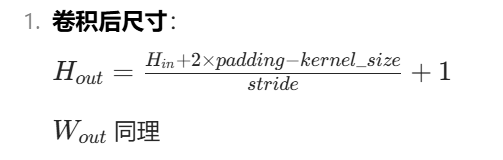

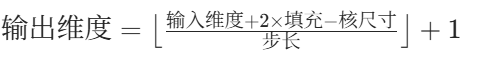

二维的卷积和池化计算公式是一致的

In [70]:
# 1. 卷积层操作
conv1 = nn.Conv2d(
    in_channels=3,        # 输入通道数
    out_channels=16,      # 输出通道数（卷积核数量）
    kernel_size=3,        # 卷积核大小
    stride=1,             # 步长
    padding=1             # 填充
)
conv_output = conv1(input_tensor) # 由于 padding=1 且 stride=1，空间尺寸保持不变
print(f"卷积后尺寸: {conv_output.shape}")  # 输出: [1, 16, 32, 32]

卷积后尺寸: torch.Size([1, 16, 32, 32])


In [71]:
# 2. 池化层操作 (减小空间尺寸)
pool = nn.MaxPool2d(kernel_size=2, stride=2) # 创建一个最大池化层
pool_output = pool(conv_output)
print(f"池化后尺寸: {pool_output.shape}")  # 输出: [1, 16, 16, 16]

池化后尺寸: torch.Size([1, 16, 16, 16])


In [72]:
# 3. 将多维张量展平为向量
flattened = pool_output.view(pool_output.size(0), -1)
print(f"展平后尺寸: {flattened.shape}")  # 输出: [1, 4096] (16*16*16=4096)



展平后尺寸: torch.Size([1, 4096])


In [73]:
# 4. 线性层操作
fc1 = nn.Linear(
    in_features=4096,     # 输入特征数
    out_features=128      # 输出特征数
)
fc_output = fc1(flattened)
print(f"线性层后尺寸: {fc_output.shape}")  # 输出: [1, 128]

线性层后尺寸: torch.Size([1, 128])


In [74]:
# 5. 再经过一个线性层（例如分类器）
fc2 = nn.Linear(128, 10)  # 假设是10分类问题
final_output = fc2(fc_output)
print(f"最终输出尺寸: {final_output.shape}")  # 输出: [1, 10]
print(final_output)

最终输出尺寸: torch.Size([1, 10])
tensor([[-0.3018, -0.4308,  0.3248,  0.2808,  0.5109, -0.0881, -0.0787, -0.0700,
         -0.1004, -0.0580]], grad_fn=<AddmmBackward>)


多分类问题通常使用Softmax，二分类问题用Sigmoid

In [75]:
# 使用Softmax替代Sigmoid
softmax = nn.Softmax(dim=1)  # 在类别维度上进行Softmax
class_probs = softmax(final_output)
print(f"Softmax输出: {class_probs}")  # 总和为1的概率分布
print(f"Softmax输出总和: {class_probs.sum():.4f}")

Softmax输出: tensor([[0.0712, 0.0626, 0.1332, 0.1275, 0.1605, 0.0882, 0.0890, 0.0898, 0.0871,
         0.0909]], grad_fn=<SoftmaxBackward>)
Softmax输出总和: 1.0000


通过这种方法，可以很自然的看到每一层输出的shape，实际上在pycharm等非交互式环境ipynb时，可以借助断点+调试控制台不断测试维度信息，避免报错。

## 二、广播机制

什么叫做广播机制

PyTorch 的广播机制（Broadcasting）是一种强大的张量运算特性，允许在不同形状的张量之间进行算术运算，而无需显式地扩展张量维度或复制数据。这种机制使得代码更简洁高效，尤其在处理多维数据时非常实用。

当对两个形状不同的张量进行运算时，PyTorch 会自动调整它们的形状，使它们在维度上兼容。具体规则如下：

从右向左比较维度：PyTorch 从张量的最后一个维度开始向前比较，检查每个维度的大小是否相同或其中一个为 1。
维度扩展规则：
如果两个张量的某个维度大小相同，则继续比较下一个维度。
如果其中一个张量的某个维度大小为 1，则该维度会被扩展为另一个张量对应维度的大小。
如果两个张量的某个维度大小既不相同也不为 1，则会报错。


好的，我将为你润色和补全这段关于 PyTorch 广播机制的解释。以下是更清晰、完整的版本：


### 2.1 PyTorch 广播机制

PyTorch 的广播机制（Broadcasting）是一种高效的张量运算特性，允许在不同形状的张量之间执行元素级操作（如加法、乘法），而无需显式扩展或复制数据。这种机制通过自动调整张量维度来实现形状兼容，使代码更简洁、计算更高效。

当对两个形状不同的张量进行运算时，PyTorch 会按以下规则自动处理维度兼容性：
1. **从右向左比较维度**：PyTorch 从张量的最后一个维度（最右侧）开始向前逐维比较。
2. **维度扩展条件**：
   - **相等维度**：若两个张量在某一维度上大小相同，则继续比较下一维度。
   - **一维扩展**：若其中一个张量在某一维度上大小为 **1**，则该维度会被扩展为另一个张量对应维度的大小。
   - **不兼容错误**：若某一维度大小既不相同也不为 **1**，则抛出 `RuntimeError`。-----维度必须满足广播规则，否则会报错。
3. **维度补全规则**：若一个张量的维度少于另一个，则在其**左侧补 1** 直至维度数匹配。


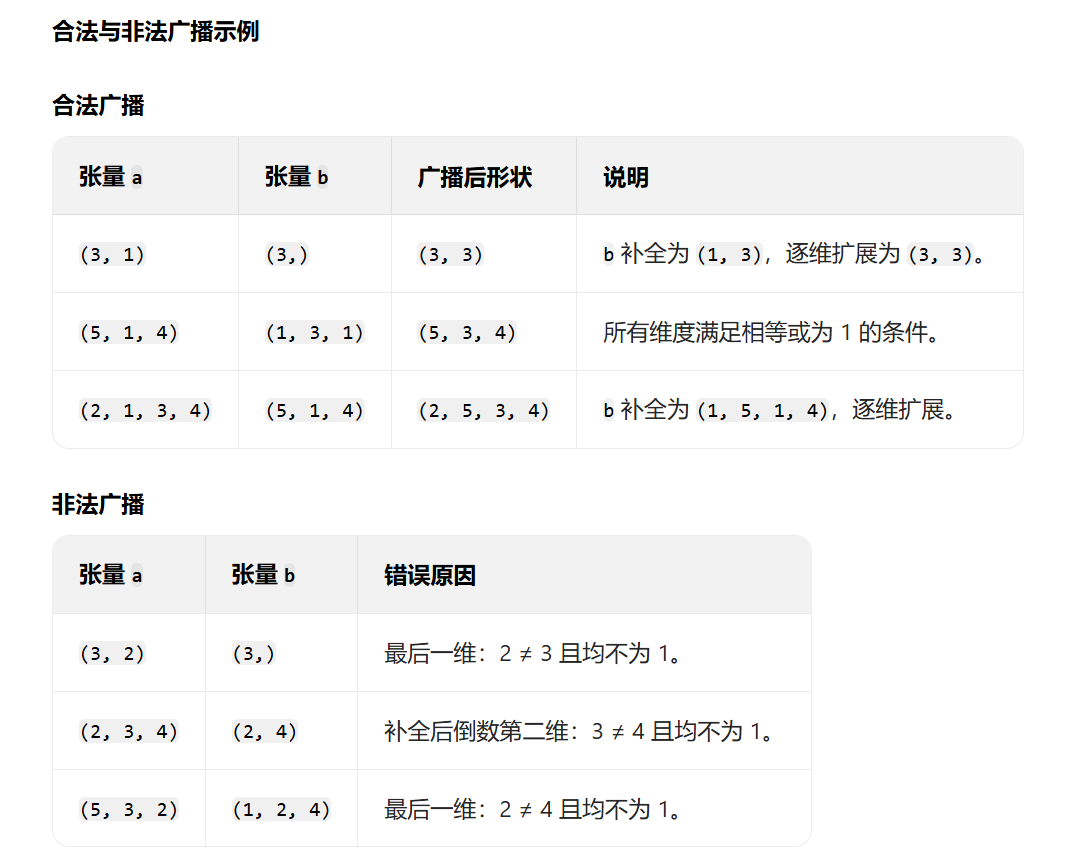

关注2个信息

1. 广播后的尺寸变化
2. 扩展后的值变化

### 2.1 加法的广播机制

二维张量与一维向量相加

In [76]:
import torch

# 创建原始张量
a = torch.tensor([[10], [20], [30]])  # 形状: (3, 1)
b = torch.tensor([1, 2, 3])          # 形状: (3,)

result = a + b
# 广播过程
# 1. b补全维度: (3,) → (1, 3)
# 2. a扩展列: (3, 1) → (3, 3)
# 3. b扩展行: (1, 3) → (3, 3)
# 最终形状: (3, 3)


print("原始张量a:")
print(a)


print("\n原始张量b:")
print(b)


print("\n广播后a的值扩展:")
print(torch.tensor([[10, 10, 10],
                    [20, 20, 20],
                    [30, 30, 30]]))  # 实际内存中未复制，仅逻辑上扩展

print("\n广播后b的值扩展:")
print(torch.tensor([[1, 2, 3],
                    [1, 2, 3],
                    [1, 2, 3]]))  # 实际内存中未复制，仅逻辑上扩展

print("\n加法结果:")
print(result)

原始张量a:
tensor([[10],
        [20],
        [30]])

原始张量b:
tensor([1, 2, 3])

广播后a的值扩展:
tensor([[10, 10, 10],
        [20, 20, 20],
        [30, 30, 30]])

广播后b的值扩展:
tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])

加法结果:
tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])


三维张量与二维张量相加

In [77]:
# 创建原始张量
a = torch.tensor([[[1], [2]], [[3], [4]]])  # 形状: (2, 2, 1)
b = torch.tensor([[10, 20]])               # 形状: (1, 2)

# 广播过程
# 1. b补全维度: (1, 2) → (1, 1, 2)
# 2. a扩展第三维: (2, 2, 1) → (2, 2, 2)
# 3. b扩展第一维: (1, 1, 2) → (2, 1, 2)
# 4. b扩展第二维: (2, 1, 2) → (2, 2, 2)
# 最终形状: (2, 2, 2)

result = a + b
print("原始张量a:")
print(a)


print("\n原始张量b:")
print(b)


print("\n广播后a的值扩展:")
print(torch.tensor([[[1, 1],
                     [2, 2]],
                    [[3, 3],
                     [4, 4]]]))  # 实际内存中未复制，仅逻辑上扩展

print("\n广播后b的值扩展:")
print(torch.tensor([[[10, 20],
                     [10, 20]],
                    [[10, 20],
                     [10, 20]]]))  # 实际内存中未复制，仅逻辑上扩展

print("\n加法结果:")
print(result)


原始张量a:
tensor([[[1],
         [2]],

        [[3],
         [4]]])

原始张量b:
tensor([[10, 20]])

广播后a的值扩展:
tensor([[[1, 1],
         [2, 2]],

        [[3, 3],
         [4, 4]]])

广播后b的值扩展:
tensor([[[10, 20],
         [10, 20]],

        [[10, 20],
         [10, 20]]])

加法结果:
tensor([[[11, 21],
         [12, 22]],

        [[13, 23],
         [14, 24]]])


二维张量与标量相加

In [78]:
# 创建原始张量
a = torch.tensor([[1, 2], [3, 4]])  # 形状: (2, 2)
b = 10                              # 标量，形状视为 ()

# 广播过程
# 1. b补全维度: () → (1, 1)
# 2. b扩展第一维: (1, 1) → (2, 1)
# 3. b扩展第二维: (2, 1) → (2, 2)
# 最终形状: (2, 2)

result = a + b
print("原始张量a:")
print(a)
# 输出:
# tensor([[1, 2],
#         [3, 4]])

print("\n标量b:")
print(b)
# 输出: 10

print("\n广播后b的值扩展:")
print(torch.tensor([[10, 10],
                    [10, 10]]))  # 实际内存中未复制，仅逻辑上扩展

print("\n加法结果:")
print(result)
# 输出:
# tensor([[11, 12],
#         [13, 14]])

原始张量a:
tensor([[1, 2],
        [3, 4]])

标量b:
10

广播后b的值扩展:
tensor([[10, 10],
        [10, 10]])

加法结果:
tensor([[11, 12],
        [13, 14]])


高维张量与低维张量相加

In [79]:
# 创建原始张量
a = torch.tensor([[[1, 2], [3, 4]]])  # 形状: (1, 2, 2)
b = torch.tensor([[5, 6]])            # 形状: (1, 2)

# 广播过程
# 1. b补全维度: (1, 2) → (1, 1, 2)
# 2. b扩展第二维: (1, 1, 2) → (1, 2, 2)
# 最终形状: (1, 2, 2)

result = a + b
print("原始张量a:")
print(a)
# 输出:
# tensor([[[1, 2],
#          [3, 4]]])

print("\n原始张量b:")
print(b)
# 输出:
# tensor([[5, 6]])

print("\n广播后b的值扩展:")
print(torch.tensor([[[5, 6],
                     [5, 6]]]))  # 实际内存中未复制，仅逻辑上扩展

print("\n加法结果:")
print(result)
# 输出:
# tensor([[[6, 8],
#          [8, 10]]])

原始张量a:
tensor([[[1, 2],
         [3, 4]]])

原始张量b:
tensor([[5, 6]])

广播后b的值扩展:
tensor([[[5, 6],
         [5, 6]]])

加法结果:
tensor([[[ 6,  8],
         [ 8, 10]]])


关键总结
1. 尺寸变化：广播后的形状由各维度的最大值决定（示例 2 中最终形状为 (2, 2, 2)）。
2. 值扩展：维度为 1 的张量通过复制扩展值（示例 1 中 b 从 [1, 2, 3] 扩展为三行相同的值）。
3. 内存效率：扩展是逻辑上的，实际未复制数据，避免了内存浪费。

### 2.2 乘法的广播机制

矩阵乘法（@）的特殊规则

矩阵乘法除了遵循通用广播规则外，还需要满足矩阵乘法的维度约束：

最后两个维度必须满足：A.shape[-1] == B.shape[-2]（即 A 的列数等于 B 的行数）

其他维度（批量维度）：遵循通用广播规则

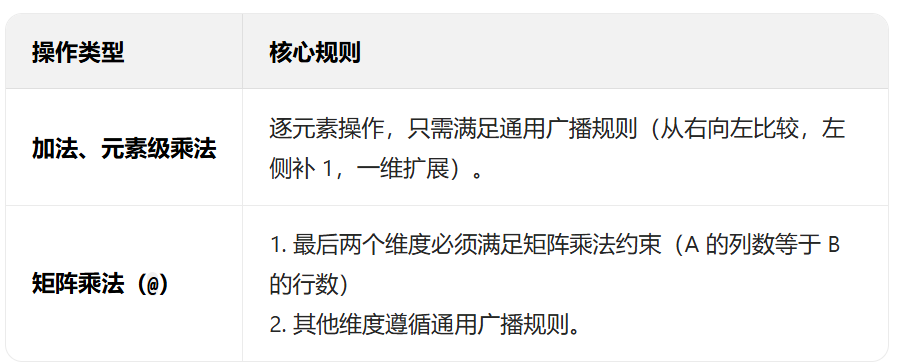

批量矩阵与单个矩阵相乘

In [80]:
import torch

# A: 批量大小为2，每个是3×4的矩阵
A = torch.randn(2, 3, 4)  # 形状: (2, 3, 4)

# B: 单个4×5的矩阵
B = torch.randn(4, 5)     # 形状: (4, 5)

# 广播过程：
# 1. B补全维度: (4, 5) → (1, 4, 5)
# 2. B扩展第一维: (1, 4, 5) → (2, 4, 5)
# 矩阵乘法: (2, 3, 4) @ (2, 4, 5) → (2, 3, 5)
result = A @ B            # 结果形状: (2, 3, 5)

print("A形状:", A.shape)  # 输出: torch.Size([2, 3, 4])
print("B形状:", B.shape)  # 输出: torch.Size([4, 5])
print("结果形状:", result.shape)  # 输出: torch.Size([2, 3, 5])

A形状: torch.Size([2, 3, 4])
B形状: torch.Size([4, 5])
结果形状: torch.Size([2, 3, 5])


批量矩阵与批量矩阵相乘（部分广播）

In [81]:
# A: 批量大小为3，每个是2×4的矩阵
A = torch.randn(3, 2, 4)  # 形状: (3, 2, 4)

# B: 批量大小为1，每个是4×5的矩阵
B = torch.randn(1, 4, 5)  # 形状: (1, 4, 5)

# 广播过程：
# B扩展第一维: (1, 4, 5) → (3, 4, 5)
# 矩阵乘法: (3, 2, 4) @ (3, 4, 5) → (3, 2, 5)
result = A @ B            # 结果形状: (3, 2, 5)

print("A形状:", A.shape)  # 输出: torch.Size([3, 2, 4])
print("B形状:", B.shape)  # 输出: torch.Size([1, 4, 5])
print("结果形状:", result.shape)  # 输出: torch.Size([3, 2, 5])

A形状: torch.Size([3, 2, 4])
B形状: torch.Size([1, 4, 5])
结果形状: torch.Size([3, 2, 5])


三维张量与二维张量相乘（高维广播）

In [82]:
# A: 批量大小为2，通道数为3，每个是4×5的矩阵
A = torch.randn(2, 3, 4, 5)  # 形状: (2, 3, 4, 5)

# B: 单个5×6的矩阵
B = torch.randn(5, 6)        # 形状: (5, 6)

# 广播过程：
# 1. B补全维度: (5, 6) → (1, 1, 5, 6)
# 2. B扩展第一维: (1, 1, 5, 6) → (2, 1, 5, 6)
# 3. B扩展第二维: (2, 1, 5, 6) → (2, 3, 5, 6)
# 矩阵乘法: (2, 3, 4, 5) @ (2, 3, 5, 6) → (2, 3, 4, 6)
result = A @ B               # 结果形状: (2, 3, 4, 6)

print("A形状:", A.shape)     # 输出: torch.Size([2, 3, 4, 5])
print("B形状:", B.shape)     # 输出: torch.Size([5, 6])
print("结果形状:", result.shape)  # 输出: torch.Size([2, 3, 4, 6])

A形状: torch.Size([2, 3, 4, 5])
B形状: torch.Size([5, 6])
结果形状: torch.Size([2, 3, 4, 6])
